# sklearn Regression - 수치예측

In [14]:
import warnings
warnings.filterwarnings('ignore')

# 실습용 데이터 설정

* pandas DataFrame
 * Insurance.csv

In [15]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Insurance.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
DF.head(3)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


> ## 1) 분석 변수 선택

* X : 'age', 'bmi', 'children'
* y : 'expenses'

In [16]:
DF1 = DF[['expenses', 'age', 'bmi', 'children']]

DF1.head(3)

,expenses,age,bmi,children
0,16884.9240,19,27.90,0
1,1725.5523,18,33.77,1
2,4449.4620,28,33.00,3


> ## 2) Train &Test Split

* 7:3

In [17]:
from sklearn.model_selection import train_test_split

X = DF1[['age', 'bmi', 'children']]
y = DF1['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (936, 3) (936,)
Test Data :  (402, 3) (402,)


# I. Multivariate Regression

> ## 1) 모델 생성

In [ ]:
%%time

from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True,
                      n_jobs = -1)

MR.fit(X_train, y_train)

CPU times: user 20.8 ms, sys: 6.71 ms, total: 27.5 ms
Wall time: 107 ms


> ## 2) 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, MR.predict(X_test))

114300134.03204554

# II. Ridge Regression

> ## 1) 모델 생성

* alpha : Regularization strength
 - default : 1.0
 - 값이 커지면 weight 값을 0에 가깝게 학습
 - 값이 작아지면 weight 값을 제한하지 않음
* solver : Optimization Method
 - 'cholesy' : Matrix Decomposition(숄레스키 행렬분해)
 - 'sag' : Stochastic Average Gradient Descent
    * solver = 'sag'
    * random_state = 2045
    * max_iter = 1000

In [ ]:
%%time

from sklearn.linear_model import Ridge

RG = Ridge(normalize = True, 
           alpha = 0.3,
           solver = 'cholesky')   

RG.fit(X_train, y_train)

CPU times: user 6.75 ms, sys: 0 ns, total: 6.75 ms
Wall time: 14.6 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, RG.predict(X_test))

113578068.78448391

# III. Lasso Regression

> ## 1) 모델 생성

* alpha : Regularization strength
 - default : 1.0
 - 값이 커지면 weight 값을 0에 가깝게 학습
 - 값이 작아지면 weight 값을 제한하지 않음

In [ ]:
%%time

from sklearn.linear_model import Lasso

LS = Lasso(normalize = True, 
           alpha = 0.2)
   
LS.fit(X_train, y_train)

CPU times: user 3.31 ms, sys: 333 µs, total: 3.64 ms
Wall time: 3.42 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, LS.predict(X_test))

114279766.62560357

# IV. ElasticNet Regression

> ## 1) 모델 생성

* l1_ratio : default = 0.5

In [ ]:
%%time

from sklearn.linear_model import ElasticNet

EN = ElasticNet(normalize = True, 
                alpha = 0.001,
                l1_ratio = 0.7)
   
EN.fit(X_train, y_train)

CPU times: user 4.25 ms, sys: 0 ns, total: 4.25 ms
Wall time: 4.89 ms


> ## 2) 모델 평가

In [ ]:
mean_squared_error(y_test, EN.predict(X_test))

113571195.19021483

# V. Decision Tree Regressor

> ## 1) 모델 생성

In [18]:
%%time

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5,
                            criterion ='mse')

DTR.fit(X_train, y_train)

CPU times: user 39.1 ms, sys: 15.2 ms, total: 54.3 ms
Wall time: 159 ms


> ## 2) 모델 평가

In [19]:
mean_squared_error(y_test, DTR.predict(X_test))

140104079.12184906

> ## 3) Feature Importance

In [20]:
DTR.feature_importances_

array([0.45044017, 0.48302537, 0.06653445])

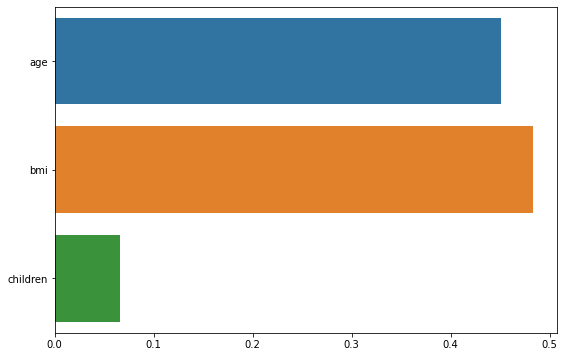

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (9, 6))
sns.barplot(DTR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# VI. Random Forest Regressor

> ## 1) 모델 생성

* criterion : default = 'mse'
 - The function to measure the quality of a split.

In [22]:
%%time

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 2000,
                            max_features = 3,
                            max_depth = 1,
                            criterion ='mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR.fit(X_train, y_train)

CPU times: user 3.77 s, sys: 506 ms, total: 4.27 s
Wall time: 3.64 s


> ## 2) 모델 평가

In [23]:
mean_squared_error(y_test, RFR.predict(X_test))

114282870.90114409

> ## 3) Feature Importance

In [24]:
RFR.feature_importances_

array([0.794, 0.206, 0.   ])

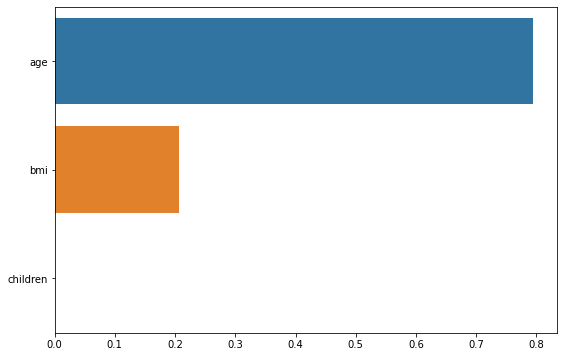

In [25]:
plt.figure(figsize = (9, 6))
sns.barplot(RFR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# VII. Gradient Boosting Machine(GBM) Regressor

* 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 생성

> ## 1) 모델 생성

* loss : Optimization Method
 -  'ls' : Least Squares Regression
* n_estimators : 생성되는 트리의 수
 - 값이 크면 모델의 복잡도가 증가
 - 오차를 보정할 기회가 증가
* learning_rate : 이전 트리의 오차를 얼마나 강한게 보정할 것인지 제어
 - 값이 크면 강한 보정에 의해 복잡한 트리 생성

In [26]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(loss = 'ls',
                                n_estimators = 9000,
                                learning_rate = 0.0001,
                                criterion ='mse',
                                max_features = 3,
                                max_depth = 1)

GBR.fit(X_train, y_train)

CPU times: user 4.24 s, sys: 0 ns, total: 4.24 s
Wall time: 4.26 s


> ## 2) 모델 평가

In [27]:
mean_squared_error(y_test, GBR.predict(X_test))

118523943.40353534

> ## 3) Feature Importance

In [28]:
GBR.feature_importances_

array([0.68958147, 0.31041853, 0.        ])

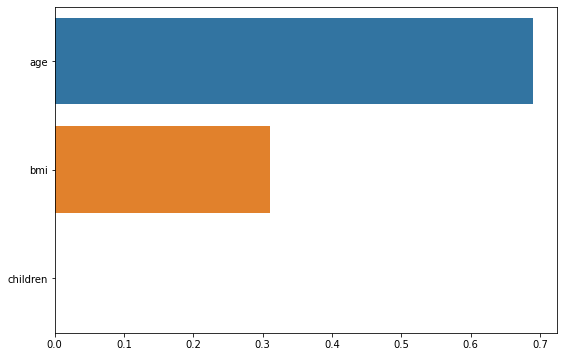

In [29]:
plt.figure(figsize = (9, 6))
sns.barplot(GBR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# VIII. Adaptive Boosting Regressor

* 이전 트리가 잘못 예측한 샘플에 가중치를 높여서 다음 트리를 훈련
* 훈련된 모델은 성능에 따라 가중치가 부여

> ## 1) 모델 생성

* loss : The loss function to use when updating the weights after each boosting iteration
* base_estimator = None
 - DecisionTreeRegressor
 - max_depth = 3
 - random_state = 2045

In [30]:
%%time

from sklearn.ensemble import AdaBoostRegressor

ABR = AdaBoostRegressor(loss = 'square',
                        n_estimators = 500,
                        learning_rate = 0.0001,
                        random_state = 2045)

ABR.fit(X_train, y_train)

CPU times: user 1.01 s, sys: 3.07 ms, total: 1.01 s
Wall time: 1.02 s


> ## 2) 모델 평가

In [31]:
mean_squared_error(y_test, ABR.predict(X_test))

118481893.52922821

> ## 3) Feature Importance

In [32]:
ABR.feature_importances_

array([0.57474029, 0.3843226 , 0.04093711])

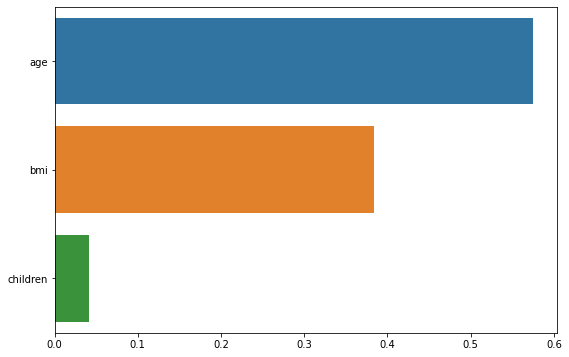

In [33]:
plt.figure(figsize = (9, 6))
sns.barplot(ABR.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# IX. eXtra Gradient Boost(XGBoost) Classifier

> ## 1) 모델 생성

In [34]:
%%time

from xgboost import XGBRegressor

XGB = XGBRegressor(booster = 'gblinear',
                   n_estimators = 100,
                   learning_rate = 0.4,
                   reg_lambda = 2.0,
                   n_jobs = -1)

XGB.fit(X_train, y_train)

[04:17:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 55 ms, sys: 18.9 ms, total: 73.9 ms
Wall time: 191 ms


> ## 2) 모델 평가

In [35]:
mean_squared_error(y_test, XGB.predict(X_test))

112756587.87271723

# X. LightGBM Regressor

> ## 1) 모델 생성

In [36]:
%%time

from lightgbm import LGBMRegressor

LGB = LGBMRegressor(linear_tree = True,
                    boosting_type = 'gbdt',
                    objective = 'regression',
                    n_estimators = 500,
                    learning_rate = 0.001,
                    max_depth = 2,
                    n_jobs = -1)

LGB.fit(X_train, y_train)

CPU times: user 107 ms, sys: 19.4 ms, total: 126 ms
Wall time: 118 ms


> ## 2) 모델 평가

In [37]:
mean_squared_error(y_test, LGB.predict(X_test))

119555446.90396042

> ## 3) Feature Importance

In [38]:
LGB.feature_importances_

array([909, 591,   0])

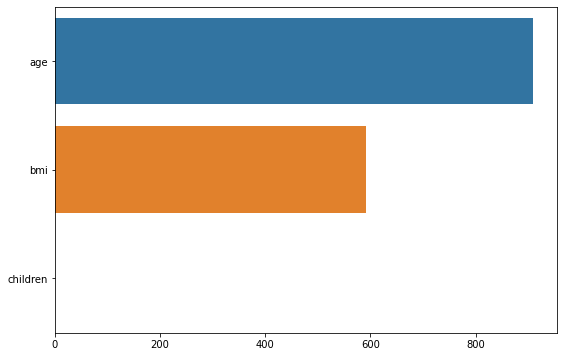

In [39]:
plt.figure(figsize = (9, 6))
sns.barplot(LGB.feature_importances_,
            ['age', 'bmi', 'children'])
plt.show()

# 
# 
# 
# The End
# 
# 
# 